In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os,glob
import mdtraj_tools
from mdtraj_tools import *
import scipy.interpolate as interpolate
import math
import warnings
warnings.filterwarnings('ignore')
#font = {'weight' : 'bold',
#        'size'   : 22}
#matplotlib.rc('font', **font)


os.chdir('/home/bxie/PycharmProjects/KDEL/kdel_simulation')
FNs = ['KDEL_xtal_restrain','KDEL_igslel_restrain','KDEL_ihspdl_restrain']


In [2]:
check_list=[('ARG 5',5), ('ASP 9',9),('ARG 47', 47),('TYR 48',48),('ASP 50', 50),('ILE 56',56), 
            ('TYR 59',59), ('ASN 60', 60), ('MET 63', 63),('LYS 64',64),('TYR 67',67),
            ('LEU 116',116),('GLU 117',117),('LEU 119',119),('TRP 120',120),('TYR 158',158),('ARG 159',159),('TYR 162',162),
            ('ASN 165',165),('TRP 166',166),('ARG 169',169)]
colors = ['orange','cyan','gold']
full_data={}
for i in range(len(FNs)):
    FN = FNs[i]
    traj_dcd = os.path.join(FN,'output',FN+'.dcd')
    top_pdb = os.path.join(FN,'output',FN+'.pdb')
    angles = get_dihedral_angle(traj_dcd, top_pdb)
    full_data[FN] = angles

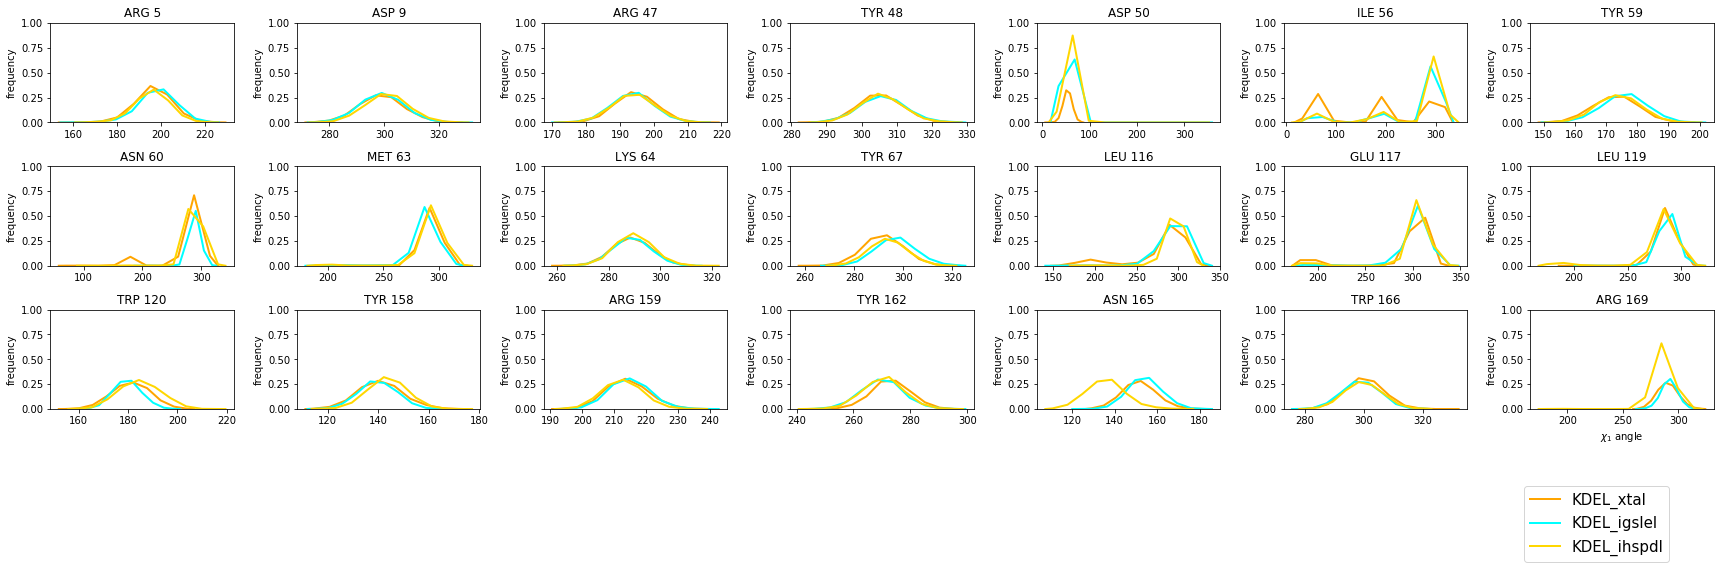

<Figure size 432x288 with 0 Axes>

In [5]:
plot_index=1
plt.figure(figsize=(24,8))
#plt.figure(figsize=(4,6))
for c in check_list:
    plt.subplot(3,len(check_list)/3, plot_index)
    specific_index = c[1]
    for i in range(len(FNs)):
        FN = FNs[i]
        top_pdb = os.path.join(FN,'output',FN+'.pdb')

        if not 'igslel' in FN:
            start_index = 1
            specific_residue_index = specific_index -start_index
            chi1= extract_specific_dihedral(full_data[FN], top_pdb, specific_residue_index)
        else:
            start_index = 0
            specific_residue_index = specific_index -start_index
            chi1= extract_specific_dihedral(full_data[FN], top_pdb, specific_residue_index)
        
        chi1= angle_unit(chi1)
        n,bins,patches = plt.hist(chi1,density=True, alpha=0.0,color= colors[i])
        bincenters = [bins[0]]
        tem = 0.5 * (bins[1:]+bins[:-1])
        for b in tem:
            bincenters.append(b)
        bincenters.append(bins[-1])
        values = [0]
        for _n in n:
            values.append(float(_n)/np.sum(n))
        values.append(0)
        plt.plot([b for b in bincenters], values, color=colors[i],linewidth=2, label=FN[:-9])
    plot_index+=1
    
    plt.ylabel('frequency')
    plt.ylim(0,1)
    plt.title(c[0])
plt.xlabel('$\chi_1$ angle')
plt.legend(bbox_to_anchor=(0.8, -0.7), fontsize=15)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.savefig('binding_site_torsions.png')
plt.show()
plt.clf()